### Exploratory Data Analysis

In this file, we will dig into the wildfire incident data further using:

- bar charts to observe trends over time
- scatterplots to look for relationships in the data
- investigations of outliers

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [2]:
fires_df_clean = pd.read_csv('./claire_data/fires_compiled.csv')

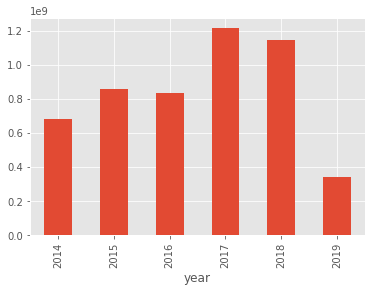

In [3]:
fires_df_clean.groupby('year')['Costs'].sum().plot(kind='bar');

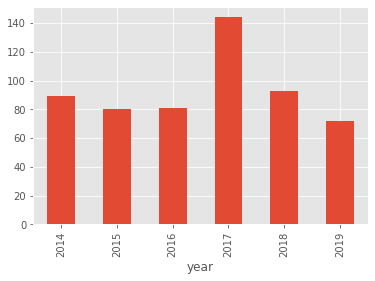

In [4]:
fires_df_clean.groupby('year')['Incident Number'].count().plot(kind='bar');

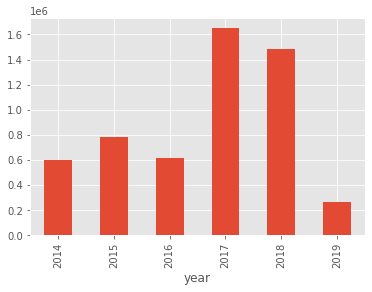

In [5]:
fires_df_clean.groupby('year')['Size'].sum().plot(kind='bar');

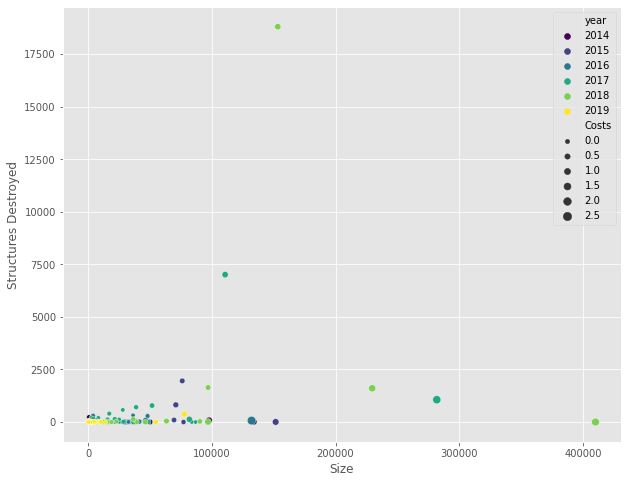

In [6]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Size', 
                y = 'Structures Destroyed', 
                data = fires_df_clean, 
                size= 'Costs',
                hue='year',
                palette='viridis')
plt.legend(loc='best');

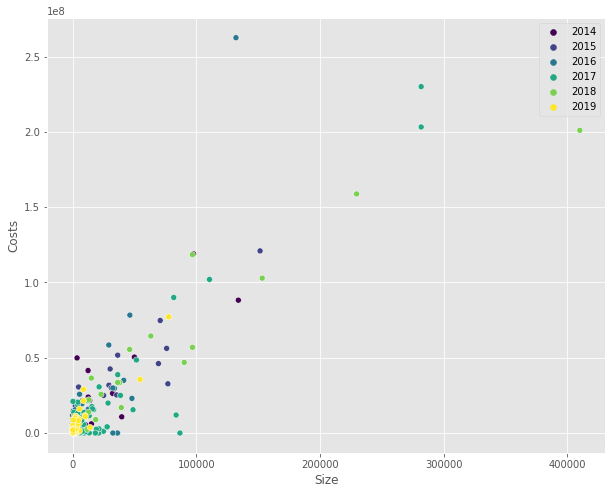

In [7]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Size', 
                y = 'Costs', 
                data = fires_df_clean, 
                hue='year',
                palette='viridis')
plt.legend(loc='best');

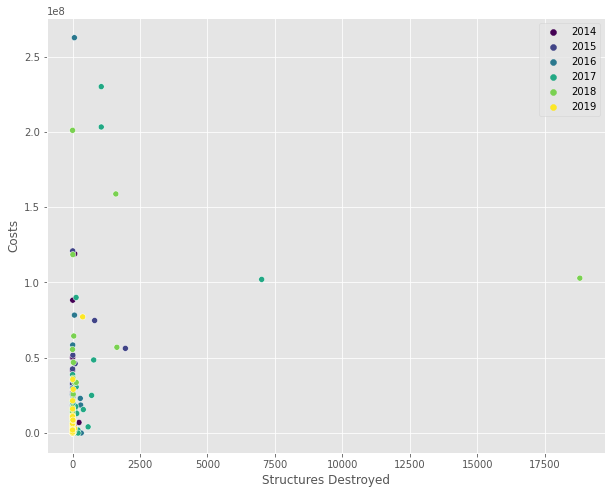

In [8]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Structures Destroyed', 
                y = 'Costs', 
                data = fires_df_clean, 
                hue='year',
                palette='viridis')
plt.legend(loc='best');

In [9]:
fires_df_clean.sort_values(by='Structures Destroyed', ascending=False).head()

,Incident Number,Incident Name,Incident Type,Latitude,Longitude,Size,Unit of Measure,Costs,Structures Destroyed,Fire Name,start_date,year,county
425,CA-BTU-016737,CAMP,WF,40,121,153336.0,Acres,102843527.0,18804,CAMP,2018-11-08,2018,Plumas
269,CA-LNU-010104,CENTRAL LNU COMPLEX,WF,38,123,110720.0,Acres,102000000.0,7010,CENTRAL LNU COMPLEX,2017-10-09,2017,Marin
102,CA-LNU-008670,VALLEY,WF,39,123,76067.0,Acres,56220000.0,1958,VALLEY,2015-09-12,2015,Lake
475,CA-VNC-091023,WOOLSEY,WF,34,119,96949.0,Acres,56943320.0,1643,WOOLSEY,2018-11-08,2018,Ventura
421,CA-WNP-001084,CARR,WF,41,123,229651.0,Acres,158744844.0,1604,CARR,2018-07-23,2018,Siskiyou


In [10]:
fires_df_clean['cost_per_acre'] = fires_df_clean['Costs'] / fires_df_clean['Size']

In [11]:
fires_df_clean['cost_per_acre'].describe()

count       559.000000
mean       4282.140017
std       16957.444288
min           0.000000
25%         392.851633
50%        1333.333333
75%        3723.493257
max      303259.000000
Name: cost_per_acre, dtype: float64

In [12]:
fires_df_clean.sort_values(by = ['cost_per_acre'], ascending=False)

,Incident Number,Incident Name,Incident Type,Latitude,Longitude,Size,Unit of Measure,Costs,Structures Destroyed,Fire Name,start_date,year,county,cost_per_acre
526,CA-ANF-002931,FIVE,WF,35,119,1.0,Acres,303259.0,0,FIVE,2019-08-03,2019,Kern,303259.000000
141,CA-BDF-010399,SUMMIT,WF,34,117,55.0,Acres,11600000.0,0,SUMMIT,2015-08-23,2015,San Bernardino,210909.090909
72,CA-SQF-002142,RANCH,WF,36,119,70.0,Acres,6500000.0,0,RANCH,2014-07-01,2014,Tulare,92857.142857
296,CA-SRF-000703,Marble,WF,41,124,319.0,Acres,21000000.0,0,MARBLE,2017-07-19,2017,Humboldt,65830.721003
93,CA-HUU-006254,HORSE,WF,40,124,146.0,Acres,8700000.0,0,HORSE,2015-08-18,2015,Humboldt,59589.041096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,CA-TGU-006039,STOLL,WF,40,122,268.0,Acres,0.0,24,STOLL,2018-06-23,2018,Tehama,0.000000
436,CA-BDF-010596,BOX,WF,34,117,61.0,Acres,0.0,0,BOX,2018-07-06,2018,San Bernardino,0.000000
449,CA-BDF-010610,VALLEY,WF,34,117,1350.0,Acres,0.0,0,VALLEY,2018-07-06,2018,San Bernardino,0.000000
83,CA-MCP-001363,Basilone Complex,WF,33,117,21240.0,Acres,0.0,0,BASILONE COMPLEX,2014-05-17,2014,San Diego,0.000000


In [13]:
fires_df_clean.groupby('year')['cost_per_acre'].mean()

year
2014    4829.836733
2015    7366.856841
2016    2771.237833
2017    2604.909057
2018    3054.650765
2019    6817.396713
Name: cost_per_acre, dtype: float64

In [14]:
fires_df_clean['cost_per_acre'].mean()

4282.140017233363

In [16]:
fires_df_clean.groupby('year')['Structures Destroyed'].mean()

year
2014      7.898876
2015     38.475000
2016     14.827160
2017     90.819444
2018    242.870968
2019      7.916667
Name: Structures Destroyed, dtype: float64